In [2]:
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import pandas as pd
import numpy as np
from PIL import Image

import umap

In [3]:
df = pd.read_parquet('/home/walml/repos/download_DECaLS_images/working_dr8_master.parquet')

In [4]:
df.head()

index         ra        dec  brickid_x  objid_x       dr8_id      mag_r  \
8   2302206  32.149425 -44.242194     100000     2211  100000_2211  17.401482   
15  2911032  32.266359 -44.223013     100000     2653  100000_2653  17.648813   
16   978095  32.334440 -44.223671     100000     2668  100000_2668  17.753190   
19  2125035  32.196171 -44.214377     100000     2861  100000_2861  17.594150   
32  2582615  32.139582 -44.341214     100000      507   100000_507  17.695265   

    fracmasked_r  shapedev_r  shapeexp_r   fracdev  weighted_radius  \
8       0.062640    3.970333    0.000000  1.000000         3.970333   
15      0.017037    0.663188    3.877279  0.186843         3.276749   
16      0.008044    0.000000    2.579882  0.000000         2.579882   
19      0.010951    1.532928    0.000000  1.000000         1.532928   
32      0.001704    0.076677    1.998424  0.124630         1.758917   

    brickid_y  objid_y                                            png_loc  \
8      100000     2211  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...   
15     100000     2653  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...   
16     100000     2668  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...   
19     100000     2861  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...   
32     100000      507  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...   

                                             fits_loc  png_loc_exists  \
8   /raid/scratch/walml/galaxy_zoo/decals/dr8_down...            True   
15  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...            True   
16  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...            True   
19  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...            True   
32  /raid/scratch/walml/galaxy_zoo/decals/dr8_down...            True   

    fits_loc_exists  
8              True  
15             True  
16             True  
19             True  
32             True

In [2]:
features_df = pd.read_parquet('/media/walml/beta1/cnn_features/cnn_features_vol_cuts.parquet').sample(30000)

In [3]:
feature_cols = [col for col in features_df if col.startswith('feat')]

In [10]:
features_df = features_df.reset_index()

In [11]:
features_df.sort_values('objid')

objid  feat_0_pred  feat_1_pred  feat_2_pred  \
13242  J000002.95+004304.8     0.000695     0.000162     0.036008   
9153   J000003.50+005407.8     0.000403     0.001097     0.070561   
1576   J000004.43-000500.0     0.001575    -0.001450     0.044987   
2359   J000007.76-004324.8     0.001879     0.000075     0.036840   
15138  J000011.60+010150.5     0.002233    -0.000190     0.033550   
...                    ...          ...          ...          ...   
24463  J235846.55+010254.0     0.001144     0.000470     0.053099   
18949  J235849.57-053030.5     0.000943    -0.000456     0.034816   
25943  J235910.92+002444.9     0.001350     0.000145     0.022755   
16119  J235919.58+112509.0     0.001430    -0.000455     0.044248   
11699  J235944.39-003436.2     0.001390     0.000301     0.013719   

       feat_3_pred  feat_4_pred  feat_5_pred  feat_6_pred  feat_7_pred  \
13242    -0.001065    -0.002438     0.002003    -0.002137    -0.002147   
9153     -0.001018    -0.002469     0.002112    -0.001890    -0.001986   
1576     -0.000893    -0.002358     0.002185    -0.002698    -0.001603   
2359     -0.000946    -0.002394     0.002171    -0.002564    -0.002054   
15138    -0.000815    -0.002335     0.002233    -0.003046    -0.001623   
...            ...          ...          ...          ...          ...   
24463    -0.001027    -0.002374     0.002203    -0.002417    -0.000998   
18949    -0.001111    -0.002449     0.002026    -0.002071    -0.002824   
25943    -0.001014    -0.002394     0.002145    -0.002218    -0.001361   
16119    -0.000813    -0.002368     0.002194    -0.002891    -0.001174   
11699    -0.000922    -0.002437     0.002113    -0.002187    -0.002092   

       feat_8_pred  ...  feat_1271_pred  feat_1272_pred  feat_1273_pred  \
13242    -0.084948  ...        0.063187       -0.001147       -0.003282   
9153     -0.073653  ...        0.119425       -0.001643       -0.047603   
1576     -0.037698  ...        0.090832       -0.000897       -0.036331   
2359     -0.028070  ...        0.090176       -0.001625        0.032026   
15138    -0.099704  ...        0.074334       -0.000941        0.119819   
...            ...  ...             ...             ...             ...   
24463    -0.118226  ...        0.098017       -0.001041       -0.000818   
18949     0.136782  ...        0.062553       -0.000861       -0.015242   
25943     0.097654  ...        0.069433       -0.001263        0.045978   
16119    -0.033641  ...        0.074975       -0.001631        0.080703   
11699    -0.054902  ...        0.052444       -0.001375       -0.012199   

       feat_1274_pred  feat_1275_pred  feat_1276_pred  feat_1277_pred  \
13242       -0.001919       -0.004258        0.001953       -0.001913   
9153        -0.001245       -0.003334        0.001947       -0.001807   
1576         0.000209       -0.003658        0.002011       -0.001625   
2359        -0.000638       -0.003672        0.002011       -0.001751   
15138        0.000386       -0.003417        0.002043       -0.001578   
...               ...             ...             ...             ...   
24463       -0.000441       -0.002951        0.001987       -0.001568   
18949       -0.001101       -0.004402        0.001966       -0.001859   
25943       -0.000648       -0.003641        0.001979       -0.001720   
16119       -0.000131       -0.003264        0.002010       -0.001606   
11699       -0.000580       -0.003842        0.001977       -0.001748   

       feat_1278_pred  feat_1279_pred  \
13242        0.000976        0.000751   
9153         0.001201        0.001028   
1576         0.000271       -0.000392   
2359         0.000737        0.000386   
15138        0.000526       -0.000029   
...               ...             ...   
24463        0.001035        0.000427   
18949        0.000745       -0.000022   
25943        0.000821        0.000412   
16119        0.000588        0.000079   
11699        0.000859        0.000597   

                                

In [12]:
vols = pd.read_parquet('/home/walml/repos/zoobot_private/gz_decals_volunteers_c.parquet', columns=['ra', 'dec', 'sersic_nmgy_r', 'petro_th50', 'petro_th90', 'iauname', 'redshift'])
len(vols)

253286

In [13]:
features_df.columns.values

array(['objid', 'feat_0_pred', 'feat_1_pred', ..., 'feat_1278_pred',
       'feat_1279_pred', 'filename'], dtype=object)

In [14]:
# good_nmgy = vols['sersic_nmgy_r'] < 3500
# # good_petro_th = (vols['petro_th50'] < 20) & (vols['petro_th90'] < 30)
# good_petro_th = (vols['petro_th50'] < 10) & (vols['petro_th90'] < 15)  # more aggressive

# good_galaxies = list(vols[good_nmgy & good_petro_th]['iauname'])
# in_good = features_df['objid'].isin(good_galaxies)

# features_df = features_df[in_good]
# print(len(features_df))
# # this will restrict to gzd-c, would be better to use nsa for sersic nmgy

27748


In [15]:
reducer = umap.UMAP()

In [16]:
embedding = reducer.fit_transform(features_df[feature_cols].values)
embedding.shape

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(27748, 2)

(-3.6153687816082076,
 9.47505563310967,
 -2.4573116317577797,
 14.168414117414514)

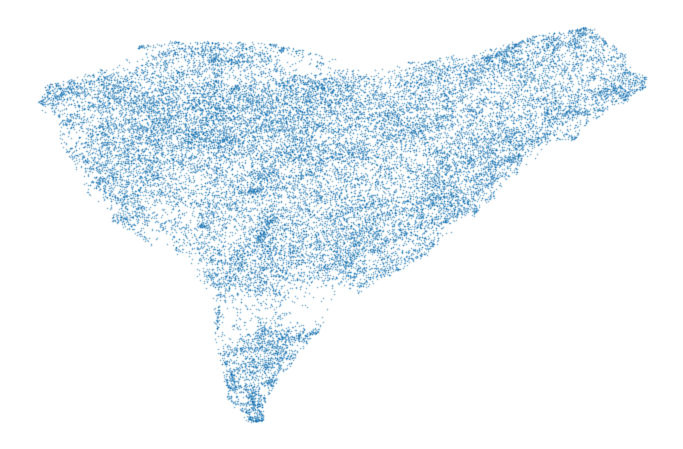

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(embedding[:, 1], embedding[:, 0], alpha=.3, s=1.)
ax.axis('off')

In [18]:
num_bins = 40

In [19]:
hist, hx, hy = np.histogram2d(embedding[:, 0], embedding[:, 1], bins=[num_bins, num_bins])

hx_indices = np.digitize(embedding[:, 0], hx)
hy_indices = np.digitize(embedding[:, 1], hy)

# embedding[0], hx_indices[0], hy_indices[0]

h_indices = np.stack([hx_indices, hy_indices], axis=1)
# h_indices.shape

images_map = {}
for image_loc, indices in zip(features_df['filename'], h_indices):
    images_map[tuple(indices)] = image_loc
#     print(image_loc, indices)
#     break

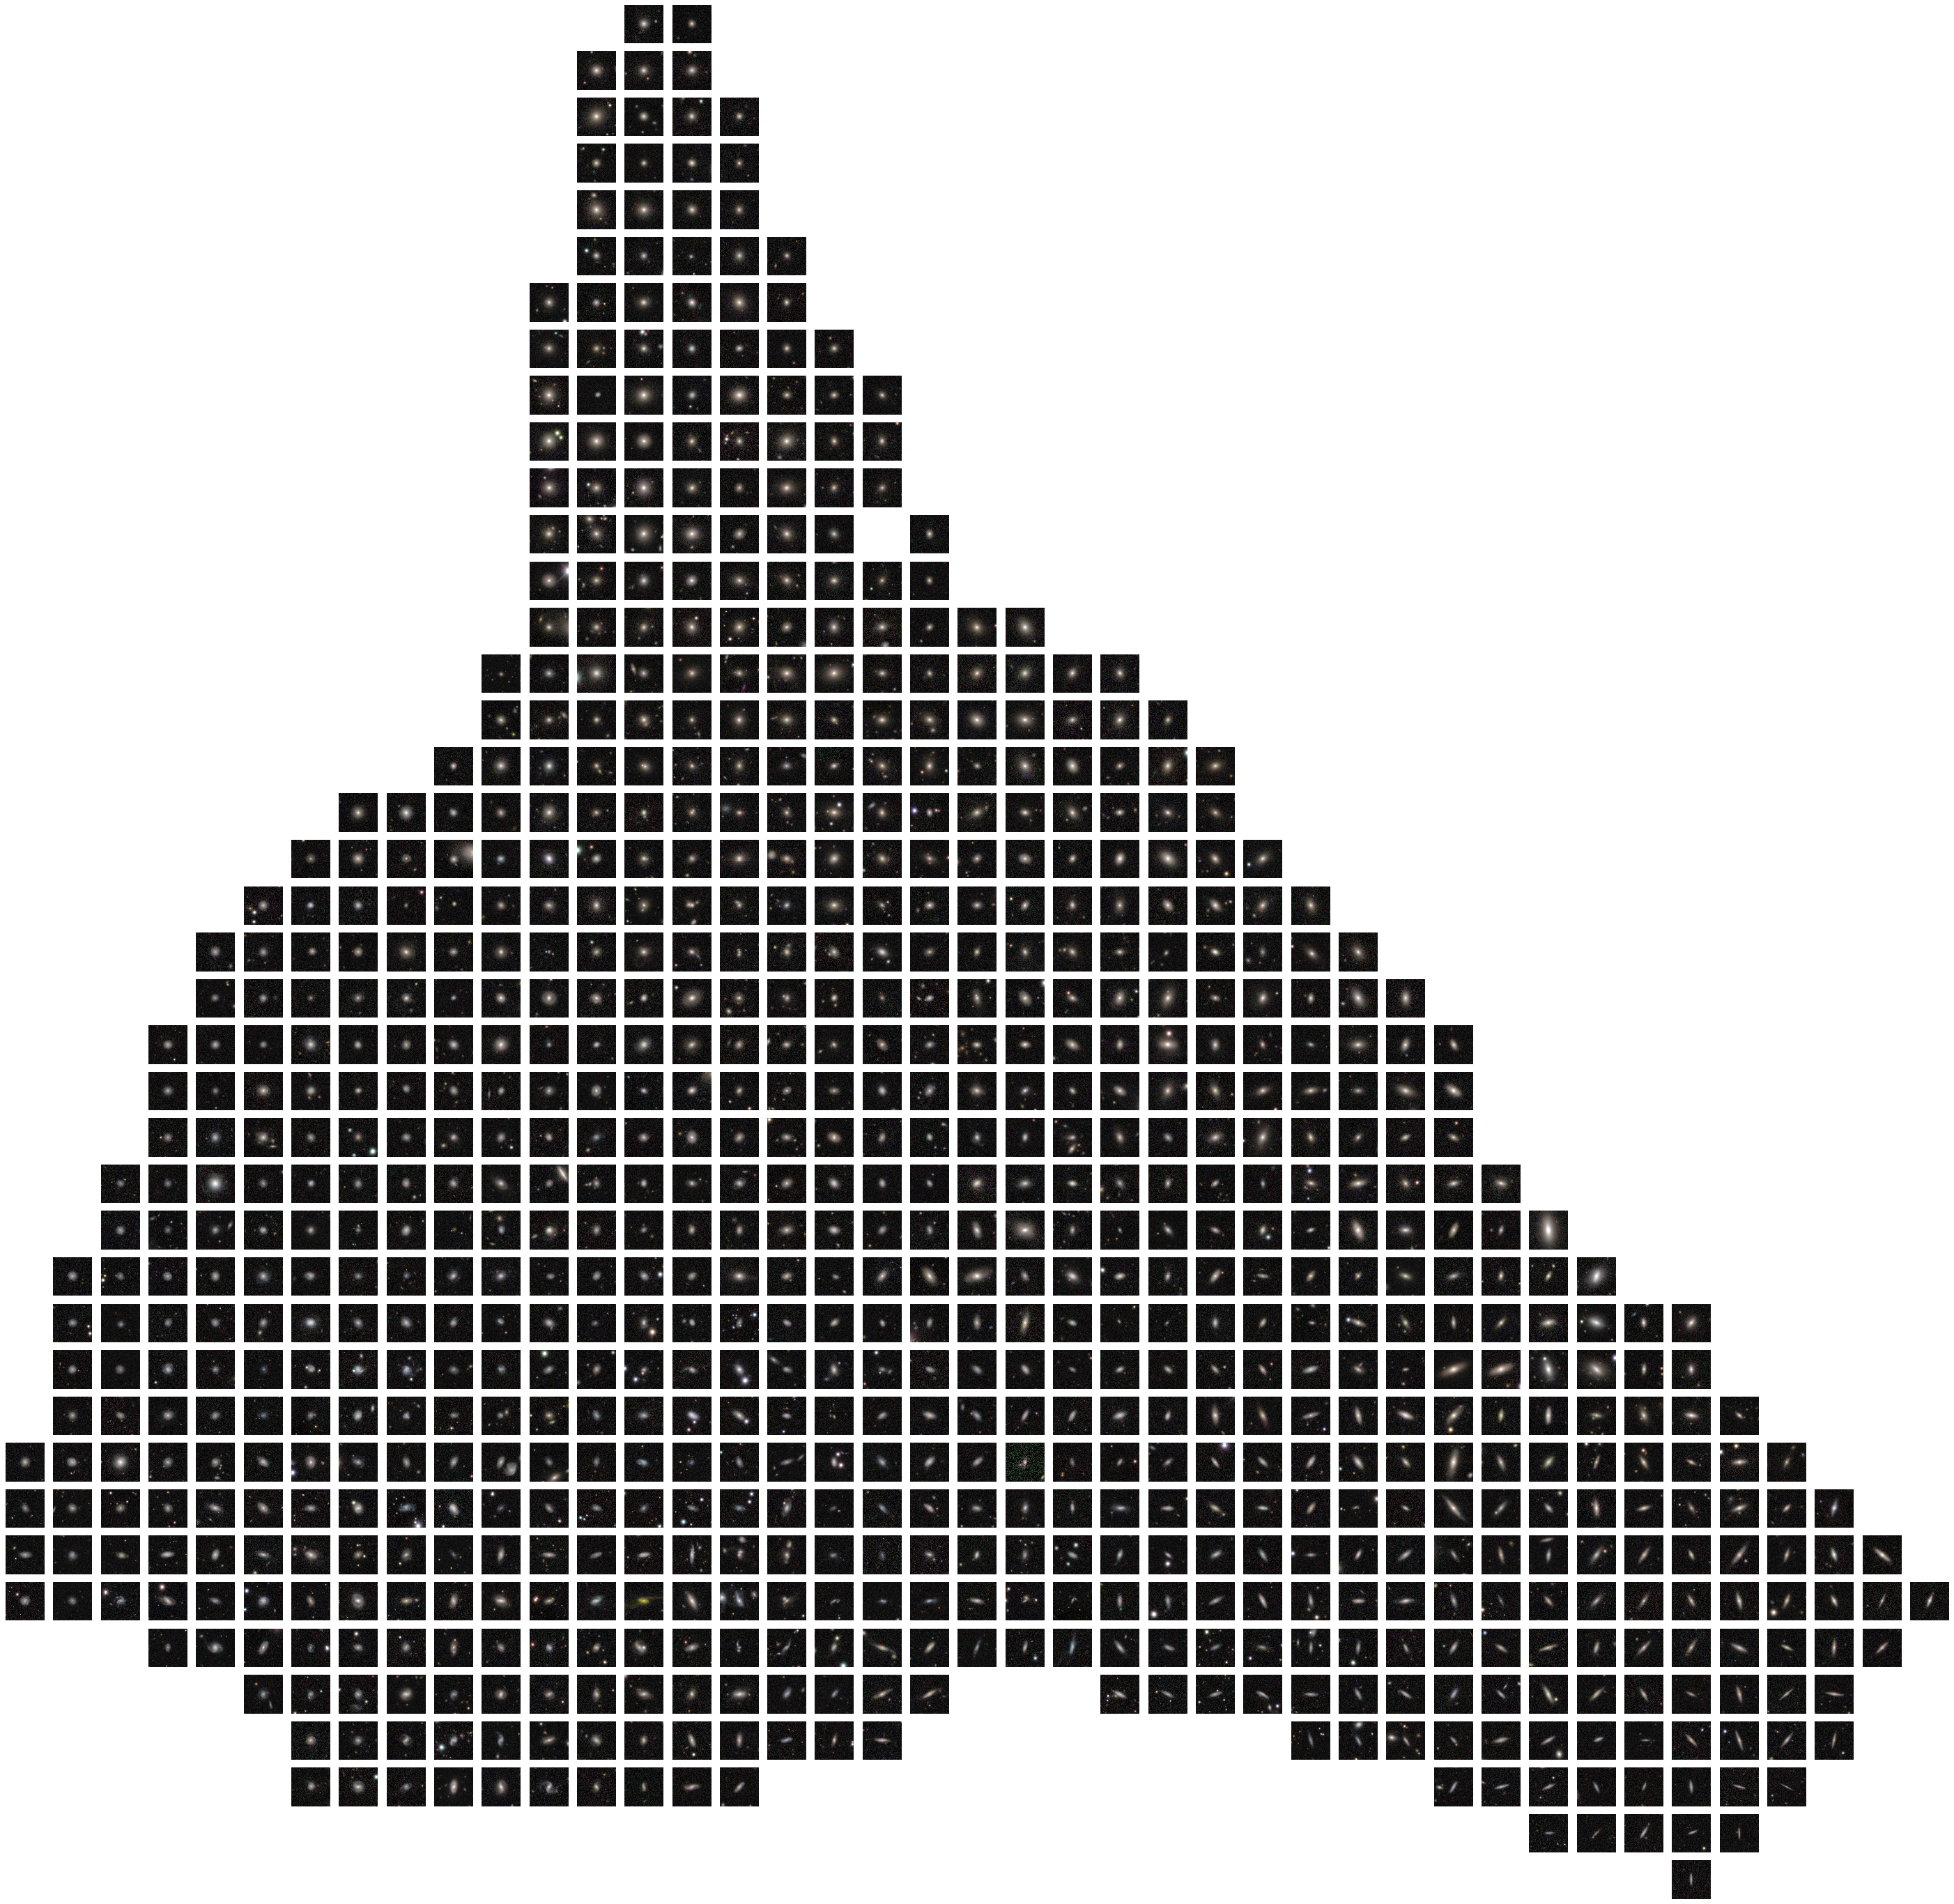

In [20]:
fig, axes = plt.subplots(ncols=num_bins+1, nrows=num_bins+1, figsize=(50, 50))

for row in axes:
    for ax in row:
        ax.axis('off')

for indices, image_loc in images_map.items():
    ax = axes[indices[0]-1, indices[1]-1]  # indices from digitize are 1-indexed
    image = Image.open(image_loc)
    ax.imshow(np.array(image))
    ax.axis('off')

In [ ]:
# fig.savefig('embedding_j150k_50x50.png')